## License Status Prediction  - Multiclass Classification - Imbalanced Dataset - EDA - Part 1

### Problem Description

    We are given a license dataset which holds various information related the business license , The objective of out problem is to predict license Status for the given business. Lets start with delving deep into the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import category_encoders as ce
import copy

In [2]:
os.listdir()

['.idea',
 '.ipynb_checkpoints',
 'dev',
 'df_summary.py',
 'EDA_license.ipynb',
 'License_Data.csv',
 'License_Data.zip',
 'License_Status_Multiclass_Classification_EDA_Part_1.ipynb',
 'modular_code.zip',
 'multi_class_classification_part_2.ipynb',
 'Untitled.ipynb',
 '__pycache__']

In [3]:
from df_summary import df_summary

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Reading the dataframe
df=pd.read_csv("License_Data.csv")

In [6]:
#Reading the   
display(df.head().T)

,0,1,2,3,4
ID,35342-20020816,1358463-20051116,1980233-20090722,1476582-20040211,1141408-20080516
LICENSE ID,1256593,1639294,1980233,1476582,1896750
ACCOUNT NUMBER,32811,262311,345008,273121,213785
SITE NUMBER,1,29,1,1,1
LEGAL NAME,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
DOING BUSINESS AS NAME,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
ADDRESS,2625 S CENTRAL PARK AVE 1,2825 W MONTROSE AVE,1605 CLAVEY RD 1,8 NORTH TRAIL,4081 JOSEPH DR
CITY,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
STATE,IL,IL,IL,IL,IL
ZIP CODE,60623.0,60618,60035,60439,60087


In [7]:
# Changing column names - raplciong the space with _ for ease of work
new_col_name=[col.replace(" ","_").lower() for col in df.columns]
new_col_name[0:5]

['id', 'license_id', 'account_number', 'site_number', 'legal_name']

In [8]:
df.columns=new_col_name

## Variable Description

**Dependent Variable**

    1. AAI - License status is issued.
    2. AAC - License status is cancelled.
    3. REV - License status is revoked.
    4. REA - License status is revoked and appealed
    5. INQ - License status is in enquiry.


## Exploratory Data Analysis & Data Cleaning 

In [9]:
df.shape # Data has 32 features and almost 86K observation.

(85895, 32)

In [10]:
df.columns

Index(['id', 'license_id', 'account_number', 'site_number', 'legal_name',
       'doing_business_as_name', 'address', 'city', 'state', 'zip_code',
       'ward', 'precinct', 'ward_precinct', 'police_district', 'license_code',
       'license_description', 'license_number', 'application_type',
       'application_created_date', 'application_requirements_complete',
       'payment_date', 'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'ssa', 'latitude',
       'longitude', 'location', 'license_status'],
      dtype='object')

In [12]:
# df_summary class takes in the dataframe and the target variable and prints the summary, 
# univariate ana;ysis and bi-variate analysis
summary=df_summary(df,"license_status")

In [13]:
summary.get_isimbalanced()

This is  Imbalanced dataset 

  index    dist
0   AAI  64.497
1   AAC  35.159
2   REV   0.338
3   REA   0.003
4   INQ   0.002


In [14]:
summary.get_summary()

,Null,dtype,unique,pct_Null,AAI_p_NL,AAC_p_NL,REV_p_NL,REA_p_NL,INQ_p_NL
index,,,,,,,,,
id,0,object,85895,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
license_id,0,int64,85895,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
account_number,0,int64,38897,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
site_number,0,int64,177,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
legal_name,0,object,38744,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
doing_business_as_name,1,object,41686,0.0%,0 - 0.0%,1 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
address,0,object,42146,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
city,0,object,1223,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
state,0,object,54,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%


**Thoughts - Summary DF**

    Null - Provides the no.of null values feature wise
    dtype - Provides the datatype of the features
    unique - Provides the no.of uniques values in the features
    pct_Null - Percentage of null values feature wise upon total no.of obervations
    "_ _p_NL" - Percentage of null values observed for a particular features upon the total no.of observations for that class.
    
**Feature to Exclude:**

    ssa - 89% of the total no.of observation in this feature is Null value
    license_id,id, account_number - id no - will not give us any additional information
    location - a combination of latitude and longitude
    application_created_date  - 75.28% data are Null values
    address - full address - similar info may also be obtained from other values.
        
        
    

In [15]:
# Creating a copy of the Original Dataset
df_wrk=copy.deepcopy(df)

In [65]:
# Dropping a features which are redundant or has high null values
cols_to_exclude=['id', 'license_id', 'account_number','address','ssa','location','application_created_date']

In [17]:
cols_to_include=df_wrk.columns.difference(cols_to_exclude).tolist()

In [18]:
cols_to_include

['application_requirements_complete',
 'application_type',
 'city',
 'conditional_approval',
 'date_issued',
 'doing_business_as_name',
 'latitude',
 'legal_name',
 'license_approved_for_issuance',
 'license_code',
 'license_description',
 'license_number',
 'license_status',
 'license_status_change_date',
 'license_term_expiration_date',
 'license_term_start_date',
 'longitude',
 'payment_date',
 'police_district',
 'precinct',
 'site_number',
 'state',
 'ward',
 'ward_precinct',
 'zip_code']

1st 10 data in application_requirements_complete
0    2002-06-28T00:00:00
1    2005-09-22T00:00:00
2    2009-07-22T00:00:00
3    2004-02-10T00:00:00
4    2008-03-24T00:00:00
5    2011-11-28T00:00:00
6    2003-12-15T00:00:00
7    2003-06-24T00:00:00
8    2002-01-23T00:00:00
9    2002-01-16T00:00:00
Name: application_requirements_complete, dtype: object 

count                   85681
unique                   3078
top       2003-12-15T00:00:00
freq                     4803
Name: application_requirements_complete, dtype: object 

2003-12-15T00:00:00    0.056057
2006-12-20T00:00:00    0.049964
2005-12-21T00:00:00    0.048949
2004-12-20T00:00:00    0.048646
2002-12-17T00:00:00    0.043779
                         ...   
2011-10-02T00:00:00    0.000012
2009-12-11T00:00:00    0.000012
2008-11-07T00:00:00    0.000012
2001-06-01T00:00:00    0.000012
2014-08-11T00:00:00    0.000012
Name: application_requirements_complete, Length: 3078, dtype: float64 

Null               214
dtype           obje

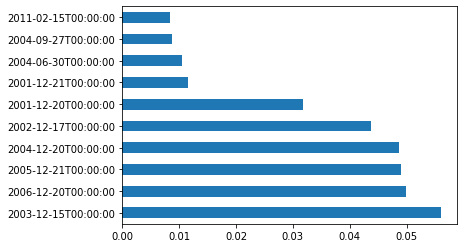

Please press y/Y to continue n/N to exit -  y
1st 10 data in application_type
0    RENEW
1    RENEW
2    ISSUE
3    ISSUE
4    RENEW
5    ISSUE
6    RENEW
7    RENEW
8    ISSUE
9    ISSUE
Name: application_type, dtype: object 

count     85895
unique        5
top       RENEW
freq      61085
Name: application_type, dtype: object 

RENEW     0.711159
ISSUE     0.272402
C_LOC     0.016299
C_CAPA    0.000081
C_EXPA    0.000058
Name: application_type, dtype: float64 

Null               0
dtype         object
unique             5
pct_Null        0.0%
AAI_p_NL    0 - 0.0%
AAC_p_NL    0 - 0.0%
REV_p_NL    0 - 0.0%
REA_p_NL    0 - 0.0%
INQ_p_NL    0 - 0.0%
Name: application_type, dtype: object


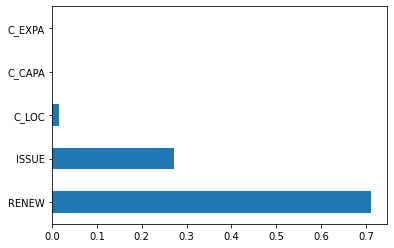

Please press y/Y to continue n/N to exit -  y
1st 10 data in city
0      CHICAGO
1      CHICAGO
2     HIGHLAND
3       LEMONT
4     WAUKEGAN
5    WOOD DALE
6     HILLSIDE
7      CHICAGO
8      LYNWOOD
9      CHICAGO
Name: city, dtype: object 

count       85895
unique       1223
top       CHICAGO
freq        36744
Name: city, dtype: object 

CHICAGO            0.427778
CICERO             0.014529
SKOKIE             0.014192
DES PLAINES        0.012189
ELK GROVE          0.008755
                     ...   
MORENO VALLEY      0.000012
SILVER LAKE        0.000012
LANDOVER           0.000012
PRAIRIE VILLAGE    0.000012
BRIDEVIEW          0.000012
Name: city, Length: 1223, dtype: float64 

Null               0
dtype         object
unique          1223
pct_Null        0.0%
AAI_p_NL    0 - 0.0%
AAC_p_NL    0 - 0.0%
REV_p_NL    0 - 0.0%
REA_p_NL    0 - 0.0%
INQ_p_NL    0 - 0.0%
Name: city, dtype: object


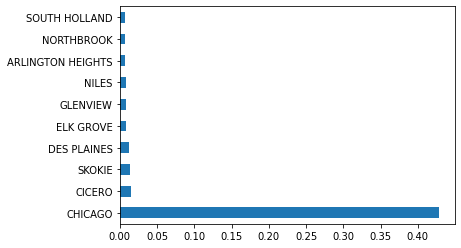

Please press y/Y to continue n/N to exit -  n


In [19]:
summary.univariate_ana(features=cols_to_include)

1st 10 data in license_description
0                         Limited Business License
1                            Mobile Food Dispenser
2                                      Home Repair
3                         Limited Business License
4                         Limited Business License
5                         Limited Business License
6                         Limited Business License
7                         Limited Business License
8                                      Home Repair
9    Motor Vehicle Repair : Engine Only (Class II)
Name: license_description, dtype: object 

count                        85895
unique                         106
top       Limited Business License
freq                         50078
Name: license_description, dtype: object 

Limited Business License                    0.583014
Home Repair                                 0.123791
Peddler, non-food                           0.032738
Home Occupation                             0.032703
Retail Food Estab

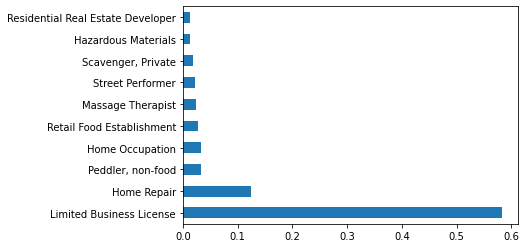

Please press y/Y to continue n/N to exit -  y
1st 10 data in state
0    IL
1    IL
2    IL
3    IL
4    IL
5    IL
6    IL
7    IL
8    IL
9    IL
Name: state, dtype: object 

count     85895
unique       54
top          IL
freq      80546
Name: state, dtype: object 

IL    0.937726
IN    0.020362
WI    0.006368
CA    0.004121
MI    0.004075
NY    0.002538
OH    0.002224
TX    0.001944
MO    0.001921
MN    0.001642
FL    0.001583
PA    0.001479
GA    0.001339
NJ    0.001246
VA    0.000943
CO    0.000896
AZ    0.000885
CT    0.000733
MA    0.000722
MD    0.000699
TN    0.000629
IA    0.000629
WA    0.000559
NC    0.000524
NE    0.000489
AL    0.000349
KS    0.000314
LA    0.000303
KY    0.000291
UT    0.000256
OR    0.000221
QC    0.000210
OK    0.000198
SC    0.000198
NV    0.000186
RI    0.000163
DC    0.000163
MS    0.000140
SD    0.000128
AR    0.000105
DE    0.000081
ID    0.000081
MT    0.000070
ON    0.000058
NH    0.000047
NM    0.000035
HI    0.000035
VT    0.000023
WV    0.000

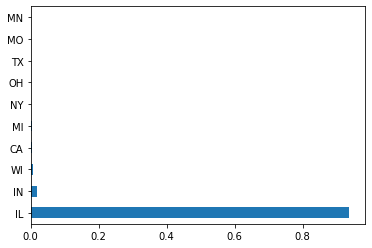

Please press y/Y to continue n/N to exit -  y


In [31]:
summary.univariate_ana(features=["license_description","state"])

## Bivariate Anslysis

application_type,C_CAPA,C_EXPA,C_LOC,ISSUE,RENEW
license_status,,,,,
AAC,7,3,287,7916,21987
AAI,0,0,1112,15425,38863
INQ,0,0,0,2,0
REA,0,0,0,0,3
REV,0,2,1,55,232


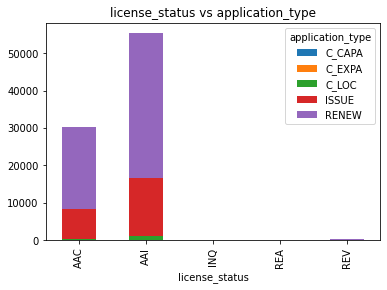

In [20]:
summary.bivariate_ana("license_status", "application_type", cr_tab=True, plot=True)

In [22]:
summary.bivariate_ana("license_status", "city", cr_tab=True, plot=False)

city,A,ABERDEEN,ACWORTH,ADDISON,ADRIAN,AHOSKE,AKRON,ALANTA,ALBANY,ALBION,...,WORTH,WORTHINGTON,WYLIE,WYOMING,YORK,YORKVILLE,YOUNGSTOWN,ZANESVILLE,ZION,ZIONSVILLE
license_status,,,,,,,,,,,,,,,,,,,,,
AAC,1,0,0,34,0,0,3,0,0,0,...,10,1,0,0,0,2,0,0,5,0
AAI,0,1,2,414,1,1,29,5,6,1,...,82,0,1,8,7,30,4,1,29,2
INQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
REA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
REV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


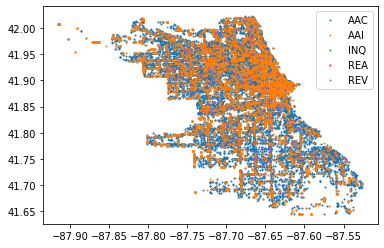

In [23]:
#Visualization of license status combinedly with latitude and longitude
sdf = df_wrk[["longitude","latitude","license_status"]]
groups = sdf.groupby('license_status')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=1, label=name)
ax.legend()

plt.show()

**Thoughts**

    This shows that location  plays an important role in issuannce of the license. 
    We can see tha AAI - which is the issuance, is more concentrated in the certain areas of the city. (Deep Orange)

## Data Transformation

1st 10 data in license_status_change_date
0                    NaN
1    2006-06-15T00:00:00
2                    NaN
3                    NaN
4                    NaN
5                    NaN
6                    NaN
7    2004-05-04T00:00:00
8                    NaN
9                    NaN
Name: license_status_change_date, dtype: object 

count                   30495
unique                   3152
top       2012-12-29T00:00:00
freq                    10060
Name: license_status_change_date, dtype: object 

2012-12-29T00:00:00    0.329890
2005-01-03T00:00:00    0.035055
2012-12-31T00:00:00    0.025250
2003-04-02T00:00:00    0.011740
2012-08-06T00:00:00    0.011215
                         ...   
2002-07-10T00:00:00    0.000033
2002-04-11T00:00:00    0.000033
2008-03-17T00:00:00    0.000033
2009-10-20T00:00:00    0.000033
2013-10-08T00:00:00    0.000033
Name: license_status_change_date, Length: 3152, dtype: float64 

Null                 55400
dtype               object
unique           

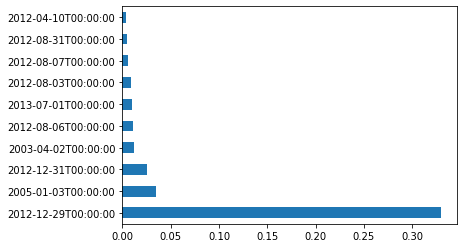

In [24]:
summary.univariate_ana(features="license_status_change_date")

In [25]:
# In the data showm above we see that, 100% fo the Null values are located in class AAI, 
# this can be a good identifier for the said class, because all other license type can only occue after initial issuance
df_wrk["license_status_change"] = np.where(df_wrk.license_status_change_date.isnull(),1,0)

In [26]:
pd.crosstab(df_wrk.license_status_change,df_wrk.license_status)

license_status,AAC,AAI,INQ,REA,REV
license_status_change,,,,,
0,30200,0,2,3,290
1,0,55400,0,0,0


In [27]:
# convert string object into date
df_wrk.application_requirements_complete=pd.to_datetime(df_wrk.application_requirements_complete)
df_wrk.payment_date = pd.to_datetime(df_wrk.payment_date)
df_wrk.license_term_start_date = pd.to_datetime(df_wrk.license_term_start_date)
df_wrk.license_term_expiration_date = pd.to_datetime(df_wrk.license_term_expiration_date)
df_wrk.license_approved_for_issuance = pd.to_datetime(df_wrk.license_approved_for_issuance)
df_wrk.date_issued = pd.to_datetime(df_wrk.date_issued)

In [46]:
df_wrk_1=copy.deepcopy(df_wrk)

In [47]:
# Label encoding 5 different classes present in the target feature license status 
df_wrk_1['target'] = df_wrk_1[['license_status']].apply(lambda col:pd.Categorical(col).codes)

In [48]:
df_wrk_1['target'].value_counts()

1    55400
0    30200
4      290
3        3
2        2
Name: target, dtype: int64

**Target Encoding**

In [49]:
#Since the features mentioned below will have multiple values to encode, and we knwo that license issuance depends on
# location target encoding will give a better solution
enc=ce.TargetEncoder(smoothing=1)
tar_enc_df = enc.fit_transform(df_wrk_1[["license_description","state","city"]],df_wrk_1["target"])
tar_enc_df.columns=[str(x)+'_'+"tar_enc" for x in tar_enc_df.columns]
tar_enc_df

,license_description_tar_enc,state_tar_enc,city_tar_enc
0,0.757458,0.64244,0.320896
1,0.430476,0.64244,0.320896
2,0.765823,0.64244,0.814815
3,0.757458,0.64244,0.932722
4,0.757458,0.64244,0.938650
...,...,...,...
85890,0.351687,0.64244,0.320896
85891,0.706522,0.64244,0.658630
85892,0.757458,0.64244,0.941818
85893,0.757458,0.64244,0.320896


In [66]:
# adding the columns encoded into columns to exclude list
cols_to_exclude.extend(['license_code',"license_description","state","city"])

**One Hot Encodsing**

In [60]:
df_ohe=df_wrk_1[['conditional_approval', 'application_type']]

In [62]:
df_dum=pd.get_dummies(df_ohe,drop_first=True)
df_dum.head()

,conditional_approval_Y,application_type_C_EXPA,application_type_C_LOC,application_type_ISSUE,application_type_RENEW
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,1


In [67]:
# adding the columns encoded into columns to exclude list
cols_to_exclude.extend(["license_status",'conditional_approval', 'application_type'])

**Feature Engineering - Generating days by differencing the dates**

   

In [58]:
# Find no.of days btw different application status date
df_wrk_1["completion_to_start"] = (df_wrk_1.license_term_start_date - df_wrk_1.application_requirements_complete).dt.days
df_wrk_1["start_to_expiry"] =  (df_wrk_1.license_term_expiration_date - df_wrk_1.license_term_start_date).dt.days
df_wrk_1["approval_to_issuance"] = (df_wrk_1.date_issued - df_wrk_1.license_approved_for_issuance).dt.days
df_wrk_1["completion_to_payment"] = (df_wrk_1.payment_date - df_wrk_1.application_requirements_complete).dt.days

df_wrk_1["presence_of_enquiry_details"] = np.where(df_wrk_1.ward.isnull() | df_wrk_1.ward_precinct.isnull() | df_wrk_1.police_district | df_wrk_1.precinct , 0 ,1 )

In [68]:
# adding the columns encoded into columns to exclude list
cols_to_exclude.extend(["license_term_start_date",'application_requirements_complete', 'license_term_expiration_date',
                        'date_issued','license_approved_for_issuance','payment_date',
                       'ward','ward_precinct','police_district','precinct'])

In [75]:
cols_to_exclude.extend(['site_number','zip_code','license_number', 'license_status_change_date'])

In [80]:
cols_to_exclude.extend(['legal_name', 'doing_business_as_name'])

**Final DataFrame for Analysis**

In [118]:
df_wrk_2=copy.deepcopy(df_wrk_1)

In [117]:
cols_to_exclude

['application_requirements_complete',
 'license_term_expiration_date',
 'application_created_date',
 'city',
 'date_issued',
 'payment_date',
 'account_number',
 'ssa',
 'address',
 'conditional_approval',
 'license_description',
 'license_term_start_date',
 'police_district',
 'id',
 'location',
 'ward_precinct',
 'license_id',
 'state',
 'license_status',
 'precinct',
 'application_type',
 'ward',
 'license_code',
 'license_approved_for_issuance',
 'site_number',
 'zip_code',
 'license_number',
 'license_status_change_date',
 'legal_name',
 'doing_business_as_name']

In [119]:
#Dropping the columns to be exlcuded
df_wrk_2.drop(cols_to_exclude,axis=1,inplace=True)

In [120]:
df_wrk_2.columns

Index(['latitude', 'longitude', 'license_status_change', 'target',
       'completion_to_start', 'start_to_expiry', 'approval_to_issuance',
       'completion_to_payment', 'presence_of_enquiry_details'],
      dtype='object')

In [121]:
df_wrk_3=copy.deepcopy(df_wrk_2)

In [122]:
df_final=pd.concat([df_wrk_3,tar_enc_df],axis=1,join="inner")
df_final.head()

,latitude,longitude,license_status_change,target,completion_to_start,start_to_expiry,approval_to_issuance,completion_to_payment,presence_of_enquiry_details,license_description_tar_enc,state_tar_enc,city_tar_enc
0,41.843613,-87.714618,1,1,49.0,364.0,1329.0,54.0,0,0.757458,0.64244,0.320896
1,41.961132,-87.699626,0,0,55.0,364.0,68.0,42.0,0,0.430476,0.64244,0.320896
2,NaN,NaN,1,1,0.0,723.0,0.0,0.0,0,0.765823,0.64244,0.814815
3,NaN,NaN,1,1,1.0,370.0,1.0,0.0,0,0.757458,0.64244,0.932722
4,NaN,NaN,1,1,53.0,729.0,1.0,72.0,0,0.757458,0.64244,0.938650


In [123]:
df_final=pd.concat([df_final,df_dum],axis=1, join="inner")

In [124]:
df_final.head()

,latitude,longitude,license_status_change,target,completion_to_start,start_to_expiry,approval_to_issuance,completion_to_payment,presence_of_enquiry_details,license_description_tar_enc,state_tar_enc,city_tar_enc,conditional_approval_Y,application_type_C_EXPA,application_type_C_LOC,application_type_ISSUE,application_type_RENEW
0,41.843613,-87.714618,1,1,49.0,364.0,1329.0,54.0,0,0.757458,0.64244,0.320896,0,0,0,0,1
1,41.961132,-87.699626,0,0,55.0,364.0,68.0,42.0,0,0.430476,0.64244,0.320896,0,0,0,0,1
2,NaN,NaN,1,1,0.0,723.0,0.0,0.0,0,0.765823,0.64244,0.814815,0,0,0,1,0
3,NaN,NaN,1,1,1.0,370.0,1.0,0.0,0,0.757458,0.64244,0.932722,0,0,0,1,0
4,NaN,NaN,1,1,53.0,729.0,1.0,72.0,0,0.757458,0.64244,0.938650,0,0,0,0,1


In [125]:
df_wrk_4=copy.deepcopy(df_final)
df_wrk_4['target']=df_wrk_4.target.astype('str')
summary=df_summary(df_wrk_4,"target")
summary.get_summary()

,Null,dtype,unique,pct_Null,1_p_NL,0_p_NL,4_p_NL,3_p_NL,2_p_NL
index,,,,,,,,,
latitude,47246,float64,21386,55.0%,43010 - 77.6%,4232 - 14.0%,2 - 0.7%,0 - 0.0%,2 - 100.0%
longitude,47246,float64,21388,55.0%,43010 - 77.6%,4232 - 14.0%,2 - 0.7%,0 - 0.0%,2 - 100.0%
license_status_change,0,int32,2,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
target,0,object,5,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
completion_to_start,395,float64,1063,0.46%,272 - 0.5%,123 - 0.4%,0 - 0.0%,0 - 0.0%,0 - 0.0%
start_to_expiry,228,float64,921,0.27%,152 - 0.3%,76 - 0.3%,0 - 0.0%,0 - 0.0%,0 - 0.0%
approval_to_issuance,6789,float64,797,7.9%,4354 - 7.9%,2434 - 8.1%,1 - 0.3%,0 - 0.0%,0 - 0.0%
completion_to_payment,1400,float64,944,1.63%,488 - 0.9%,902 - 3.0%,8 - 2.8%,0 - 0.0%,2 - 100.0%
presence_of_enquiry_details,0,int32,2,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%


In [103]:
summary.get_isimbalanced()

This is  Imbalanced dataset 

  index    dist
0     1  64.497
1     0  35.159
2     4   0.338
3     3   0.003
4     2   0.002


In [105]:
df_final.target.astype('str').value_counts()

1    55400
0    30200
4      290
3        3
2        2
Name: target, dtype: int64

### Over and Under Sampling of Data

In [126]:
# Undersampling
df_0 = df_final[df_final.target==0].sample(frac=0.3,replace=False)
df_1 = df_final[df_final.target==1].sample(frac=0.3,replace=False)
# oversamplig
df_2 = df_final[df_final.target==2].sample(frac=200,replace=True)
df_3 = df_final[df_final.target==3].sample(frac=100,replace=True)
df_4 = df_final[df_final.target==4].sample(frac=2,replace=True)

sampled_df = pd.concat([df_0,df_1,df_2,df_3,df_4])

sampled_df.target.value_counts()

1    16620
0     9060
4      580
2      400
3      300
Name: target, dtype: int64

In [127]:
# Summary of the sampled dataframe
df_wrk_4=copy.deepcopy(sampled_df)
df_wrk_4['target']=df_wrk_4.target.astype('str')
summary=df_summary(df_wrk_4,"target")
summary.get_summary()

,Null,dtype,unique,pct_Null,1_p_NL,0_p_NL,4_p_NL,2_p_NL,3_p_NL
index,,,,,,,,,
latitude,14505,float64,8528,53.8%,12848 - 77.3%,1254 - 13.8%,1 - 0.4%,2 - 100.0%,0 - 0.0%
longitude,14505,float64,8528,53.8%,12848 - 77.3%,1254 - 13.8%,1 - 0.4%,2 - 100.0%,0 - 0.0%
license_status_change,0,int32,2,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
target,0,object,5,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
completion_to_start,119,float64,561,0.44%,89 - 0.5%,30 - 0.3%,0 - 0.0%,0 - 0.0%,0 - 0.0%
start_to_expiry,72,float64,784,0.27%,51 - 0.3%,21 - 0.2%,0 - 0.0%,0 - 0.0%,0 - 0.0%
approval_to_issuance,2054,float64,461,7.62%,1334 - 8.0%,719 - 7.9%,1 - 0.4%,0 - 0.0%,0 - 0.0%
completion_to_payment,837,float64,587,3.1%,158 - 1.0%,266 - 2.9%,7 - 2.7%,2 - 100.0%,0 - 0.0%
presence_of_enquiry_details,0,int32,2,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%


**Thoughts**

    We can see from the above that Null values are located in the columns
    completion_to_start
    start_to_expiry
    approval_to_issuance
    completion_to_payment
    
    for these we may consider filling the values with column mean.
    
    Carrying out Mean Imputation will add extra value, since mean will be based on the resampled data

**Mean Imputation**

In [128]:
# mean imputation
sampled_df = sampled_df.fillna(sampled_df.mean())

In [129]:
# Summary of the sampled dataframe
df_wrk_4=copy.deepcopy(sampled_df)
df_wrk_4['target']=df_wrk_4.target.astype('str')
summary=df_summary(df_wrk_4,"target")
summary.get_summary()

,Null,dtype,unique,pct_Null,1_p_NL,0_p_NL,4_p_NL,2_p_NL,3_p_NL
index,,,,,,,,,
latitude,0,float64,8529,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
longitude,0,float64,8529,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
license_status_change,0,int32,2,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
target,0,object,5,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
completion_to_start,0,float64,562,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
start_to_expiry,0,float64,785,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
approval_to_issuance,0,float64,462,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
completion_to_payment,0,float64,588,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%
presence_of_enquiry_details,0,int32,2,0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%,0 - 0.0%


In [137]:
#Saving the final dataframe as csv
path=os.getcwd()
sampled_df.to_csv("./sampled_df.csv",index=False)

In [136]:
sampled_df.head()

,latitude,longitude,license_status_change,target,completion_to_start,start_to_expiry,approval_to_issuance,completion_to_payment,presence_of_enquiry_details,license_description_tar_enc,state_tar_enc,city_tar_enc,conditional_approval_Y,application_type_C_EXPA,application_type_C_LOC,application_type_ISSUE,application_type_RENEW
28842,41.978665,-87.699738,0,0,63.0,730.0,0.0,42.0,0,0.119616,0.64244,0.320896,0,0,0,0,1
71952,42.003605,-87.664156,0,0,50.0,364.0,1.0,28.0,0,0.450820,0.64244,0.320896,0,0,0,0,1
4967,41.880571,-87.680934,0,0,63.0,729.0,1.0,61.0,0,0.765823,0.64244,0.892925,0,0,0,0,1
79072,41.890130,-87.699736,0,0,62.0,729.0,3.0,32.0,0,0.757458,0.64244,0.320896,0,0,0,0,1
16060,41.867569,-87.685916,0,0,93.0,395.0,1.0,0.0,0,0.158552,0.64244,0.320896,0,0,0,1,0
